## Problem 1:

Part 1: Machine Learning Models

You work for an office transport company. You are in discussions with ABC Consulting company for providing transport for their employees. For this purpose, you are tasked with understanding how do the employees of ABC Consulting prefer to commute presently (between home and office). Based on the 
parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’, you are required to predict the preferred mode of transport. The project requires you to build several Machine Learning models and compare them so that the model can be finalised.

### **Data Dictionary**

**Age** : Age of the Employee in Years

**Gender** : Gender of the Employee

**Engineer** : For Engineer =1 , Non Engineer =0

**MBA** : For MBA =1 , Non MBA =0

**Work Exp** : Experience in years

**Salary** : Salary in Lakhs per Annum

**Distance** : Distance in Kms from Home to Office

**license** : If Employee has Driving Licence -1, If not, then 0

**Transport** : Mode of Transport

## 1.1 Basic data summary, Univariate, Bivariate analysis, graphs, checking correlations, outliers and missing values treatment (if necessary) and check the basic descriptive statistics of the dataset.

### <font color= "blue"> Loaded all the necessary library for the model building.
    
### Below are the head and the tail of the data for basic analysis :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes =True)
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn import metrics
import xgboost as xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix,plot_confusion_matrix
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df= pd.read_csv('Cars (2) (1) (3).csv')

## Head (First 5 Rows) of the Data Set :

In [3]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


## Tail (Last 5 Rows) of the Data Set :

In [4]:
df.tail()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport
443,39,Male,1,1,21,50.0,23.4,1,Private Transport


## The Shape of the Data :

In [5]:
print('The Shape of the Original data set is ', df.shape)
print("Row : ",df.shape[0],".           Columns : ",df.shape[1],".")

The Shape of the Original data set is  (444, 9)
Row :  444 .           Columns :  9 .


## Let's check the basic info. of the Data Set :

In [6]:
df.info()
print(' ')
print('From the above details, we can see that data has all "object", "float64" and "int64" type of variable')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB
 
From the above details, we can see that data has all "object", "float64" and "int64" type of variable


## Checking the Null values in the data :

In [7]:
null = df.isnull().sum()
print(null)
print(' ')
print('As per observation, we found no Null values in this data')

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64
 
As per observation, we found no Null values in this data


## Duplicates in the Data Set :

In [8]:
dup=df.duplicated().sum()
print('After anlaysiing the data we found',dup,"duplicate rows in the problem 1 Data Set, which is mentioned below :")

After anlaysiing the data we found 0 duplicate rows in the problem 1 Data Set, which is mentioned below :


## Description of the Data Set :

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,444,NaN,NaN,NaN,27.7477,4.41671,18,25,27,30,43
Gender,444,2,Male,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engineer,444,NaN,NaN,NaN,0.754505,0.430866,0,1,1,1,1
MBA,444,NaN,NaN,NaN,0.252252,0.434795,0,0,0,1,1
Work Exp,444,NaN,NaN,NaN,6.29955,5.1121,0,3,5,8,24
Salary,444,NaN,NaN,NaN,16.2387,10.4539,6.5,9.8,13.6,15.725,57
Distance,444,NaN,NaN,NaN,11.3232,3.60615,3.2,8.8,11,13.425,23.4
license,444,NaN,NaN,NaN,0.234234,0.423997,0,0,0,0,1
Transport,444,2,Public Transport,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Distribution Plot for Visuale Skweness :

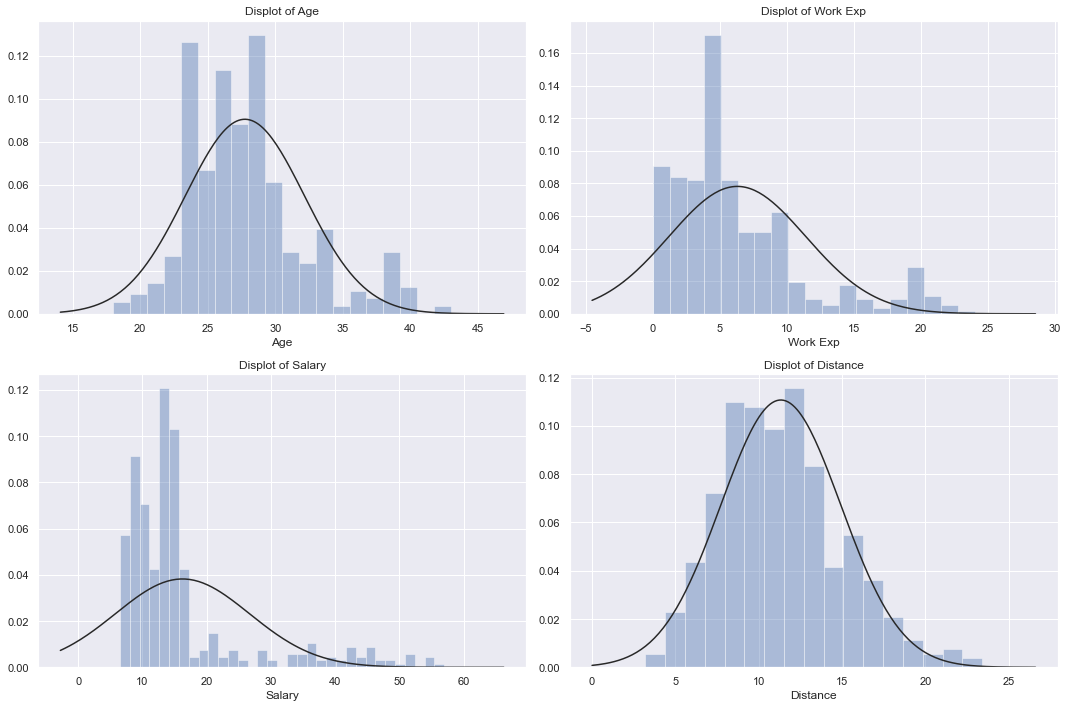

In [10]:
df_num = df[['Age','Work Exp','Salary','Distance']]
#df.select_dtypes(include=['int64','float64'])


plt.figure(figsize=(15,10))
feature = df_num.columns
for i in range(len(feature)):
    plt.subplot(2,2, i+1)
    sns.distplot(df_num[feature[i]],kde=False, fit= stats.norm, rug=False,hist=True)
    plt.title('Displot of {}'.format(feature[i]),)
    plt.tight_layout();

### Skewness in Numbers for each Numeric Variable :

In [11]:
df_num.skew(axis=0, skipna=True)

Age         0.955276
Work Exp    1.352840
Salary      2.044533
Distance    0.539851
dtype: float64

## <font color = 'green'>Observation :

- <font color = 'green'>From the above Describe Data:<font color = 'black'> We have 4, "Numerical" data type.
- <font color = 'green'>For Numeric Columns:<font color = 'black'> we have 'Age', 'Work Exp', 'Salary' and 'Distance'.
- <font color = 'green'>From the above Distribution Graph and Describe Table:<font color = 'black'> It's seem that, there most of the variable such as "Age" and "Distance" have normally distribution. 
- But after analzed very closly, we found that "Salary" and "Work Exp" has tend to show sligthly right skewness. 

### Categorical Univariate Analysis :

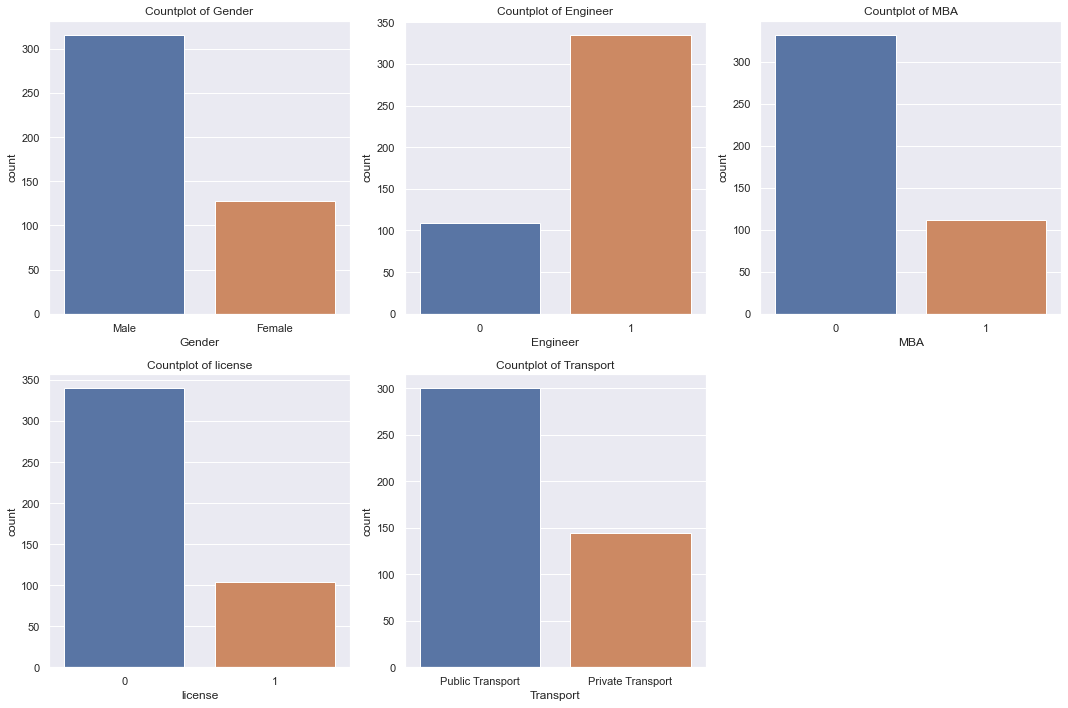

In [12]:
df_cat = df[['Gender','Engineer','MBA','license','Transport']]
#df.select_dtypes(include=['object'])

plt.figure(figsize=(15,10))
feat = df_cat.columns
for i in range(len(feat)):
    plt.subplot(2,3, i+1)
    sns.countplot(x=df_cat[feat[i]], data=df_cat)
    plt.title('Countplot of {}'.format(feat[i]))
    plt.tight_layout();


## Categorical type Variables in the Data set :

In [13]:
cat = ['Gender','Engineer','MBA','license','Transport']
for col in cat:
  df[col]=df[col].astype('object')

feats = df_cat.columns
for i in feats:
    if df[i].dtype == 'object':
        print('In this data set, we have category of', i.upper(),':',df[i].nunique())
        print(' ')
        print(df[i].value_counts().sort_values(ascending=False))
        print('_____________________________________________________________________________________________________________')
        print('\n')

In this data set, we have category of GENDER : 2
 
Male      316
Female    128
Name: Gender, dtype: int64
_____________________________________________________________________________________________________________


In this data set, we have category of ENGINEER : 2
 
1    335
0    109
Name: Engineer, dtype: int64
_____________________________________________________________________________________________________________


In this data set, we have category of MBA : 2
 
0    332
1    112
Name: MBA, dtype: int64
_____________________________________________________________________________________________________________


In this data set, we have category of LICENSE : 2
 
0    340
1    104
Name: license, dtype: int64
_____________________________________________________________________________________________________________


In this data set, we have category of TRANSPORT : 2
 
Public Transport     300
Private Transport    144
Name: Transport, dtype: int64
________________________

## <font color = 'green'>Observation :

- <font color = 'green'>From the above Describe Data:<font color = 'black'> We have 2, "Categorical" data type.
- <font color = 'green'>For Numeric Columns:<font color = 'black'> we have 'Gender' and 'Transport'.
- <font color = 'green'>From the above Graph and Describe Table:<font color = 'black'> It's seem that, there most of the people are male.
- And People tend to use "Public Transport" more.
- From above Table, there are more people with License.

## <font color = 'blue'> Let's perform Univariate, Bi-Variate and Multi-variate along with EDA to check Outliers.

### Lets perform Univariate Analysis on Numeric Variables:

In [14]:
def univariateAnalysis_numeric(column,nbins):
    print('Description of '+ column)
    print('___________________________________')
    print(df_num[column].describe(),end=' ')
    print(' ')
    
    plt.figure()
    print("\n","Distribution of "+ column)
    sns.distplot(df_num[column],kde=False, fit=stats.norm, rug=False, hist=True)
    plt.title('Histogram of ' + column)
    plt.show()
    
    plt.figure()
    ax=sns.boxplot(x=df_num[column])
    plt.title('Boxplot of ' + column)
    plt.show()
    print('===================================================================================================================')

In [15]:
lstnumericcolumns = list(df_num.columns.values)

Description of Age
___________________________________
count    444.000000
mean      27.747748
std        4.416710
min       18.000000
25%       25.000000
50%       27.000000
75%       30.000000
max       43.000000
Name: Age, dtype: float64  

 Distribution of Age


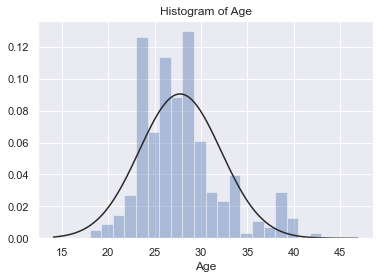

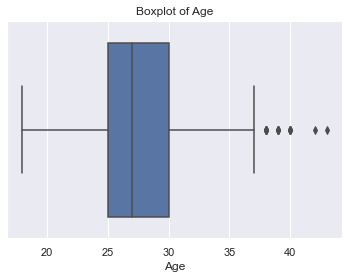

Description of Work Exp
___________________________________
count    444.000000
mean       6.299550
std        5.112098
min        0.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       24.000000
Name: Work Exp, dtype: float64  

 Distribution of Work Exp


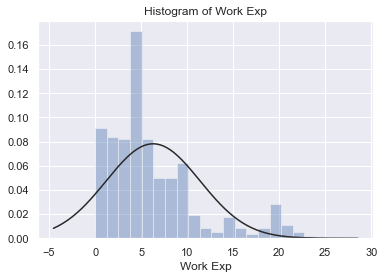

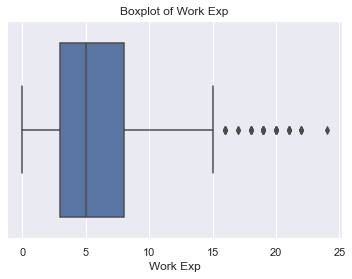

Description of Salary
___________________________________
count    444.000000
mean      16.238739
std       10.453851
min        6.500000
25%        9.800000
50%       13.600000
75%       15.725000
max       57.000000
Name: Salary, dtype: float64  

 Distribution of Salary


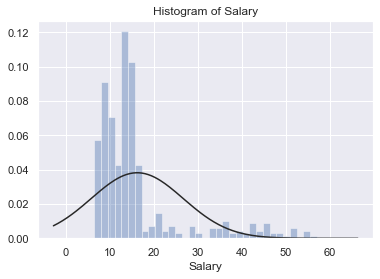

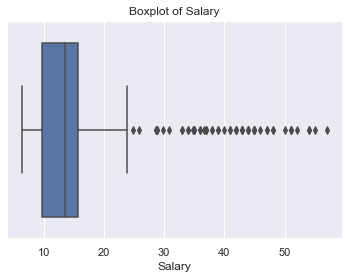

Description of Distance
___________________________________
count    444.000000
mean      11.323198
std        3.606149
min        3.200000
25%        8.800000
50%       11.000000
75%       13.425000
max       23.400000
Name: Distance, dtype: float64  

 Distribution of Distance


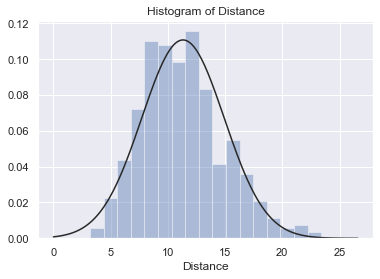

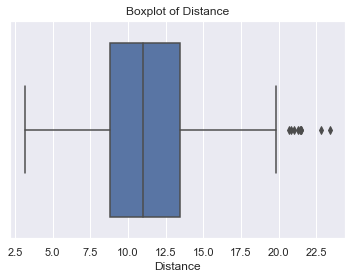

In [16]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

## <font color = "green">Observation:<font color = 'black'>

- There are 4 numeric fields in the data set.add
- Variable like :- "Salary" seens to have more outlier as compare to other variable other variable.
- Variable like :- "Age", "Work Exp", "Salary" and "Distance" also show some outliers.


### Let's perform the Univariate Analysis on Categorical Analysis :

                                         COUNT PLOT OF ALL CATEGORICAL DATA                                        


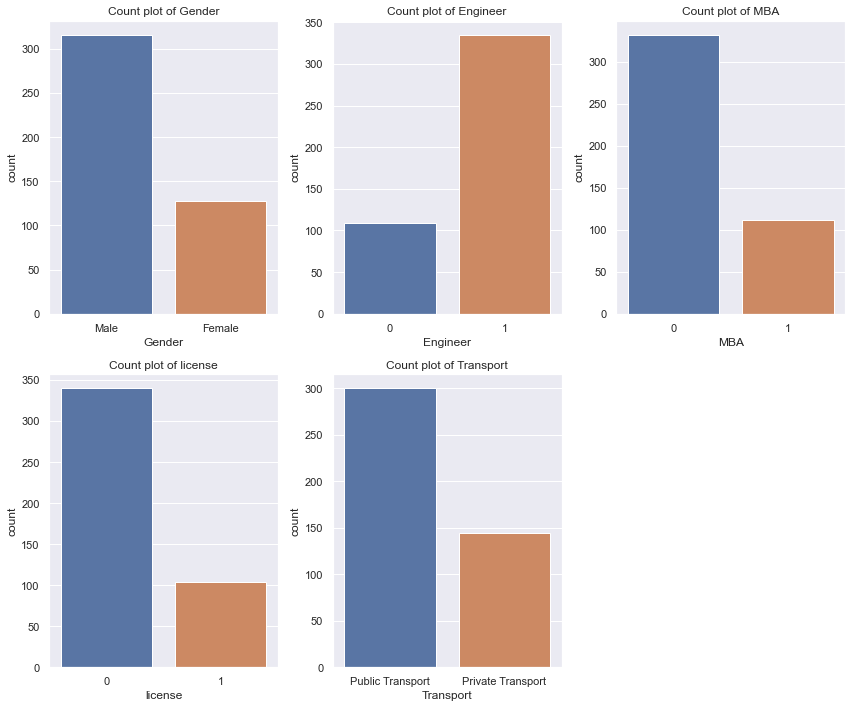

In [17]:

plt.figure(figsize=(12,10))
feat_cat = df_cat.columns
for i in range(len(feat_cat)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=df_cat[feat_cat[i]],data=df)
    plt.title("Count plot of {}".format(feat_cat[i]))
    plt.tight_layout()
print("                                         COUNT PLOT OF ALL CATEGORICAL DATA                                        ");

## <font color='green'>Observation:<font color='black'>
    
- From the above countplot of "Vote", we can see that in the "Vote" variable, "Labor" seems to have more count as compare to other.
- From the above countplot of "Gender", we can see that, female has the highest number of count in this data set.
- From the above countplot of "Engineer", the count of Engineers is more.
- From the above countplot of "License", we can see that count of employees with no license is more.

## Let's perform Bi-variate and Multi-variate Analysis :

                                       SWARM-PLOT OF ALL VARIABLES IN COMPARISION WITH 'Engineer'                              


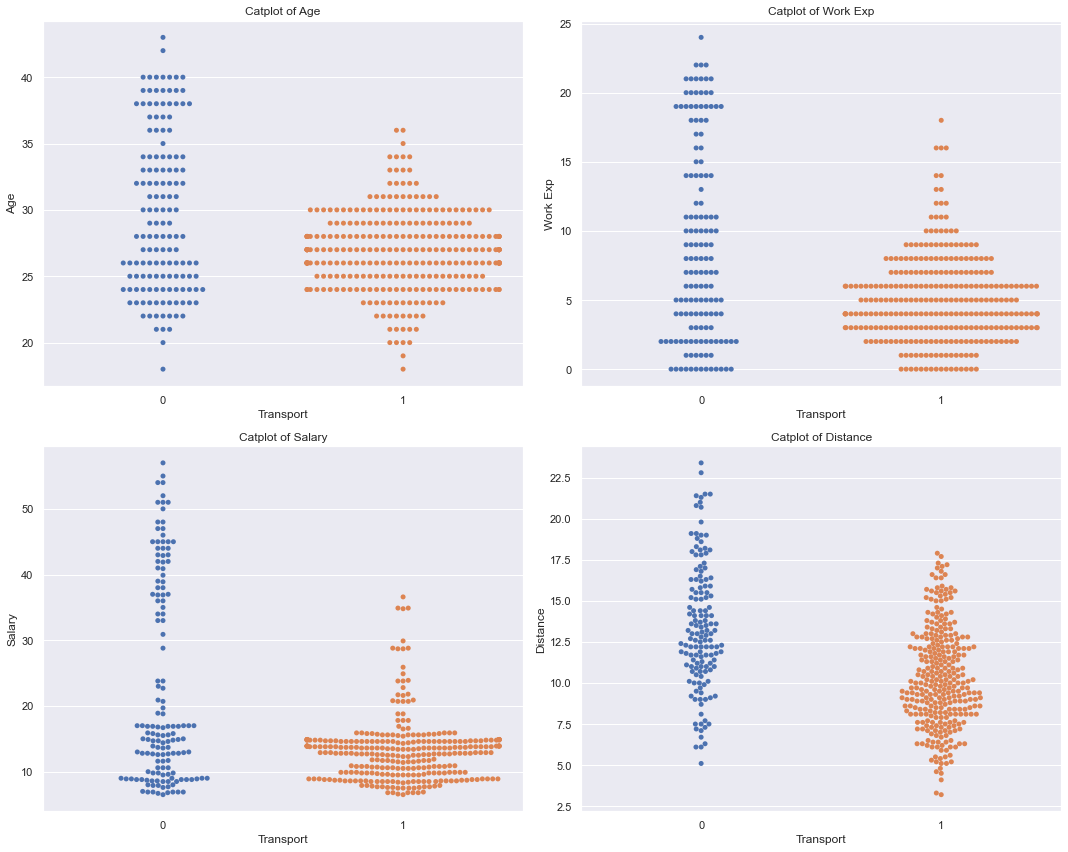

In [101]:
feature=df_num.columns
plt.figure(figsize=(15,12))
for i in range(len(feature)):
    plt.subplot(2,2,i+1)
    sns.swarmplot(y=df_num[feature[i]], x=df.Transport, data=df)
    plt.title("Catplot of {}".format(feature[i]))
    plt.tight_layout()
    
print("                                       SWARM-PLOT OF ALL VARIABLES IN COMPARISION WITH 'Engineer'                              ");

## <font color ='green'>Observation:<font color = 'black'>
    
- From above "Age" graph, we can see that the number of people are more who have engineer Degree.
- From above "Work Exp" graph, People as Engineer tend to have more count of experience people, which is between 0 to 10 years.
- From above "Salary" graph, People as Engineer, showing maximum of people having salary 10 to 20 lakhs.
- From above "Distance" graph, People as Engineer has to travel more distance. Majority of people are traveling 7.5 to 12.5 km.

                                       SWARM-PLOT OF ALL VARIABLES IN COMPARISION WITH 'MBA'                              


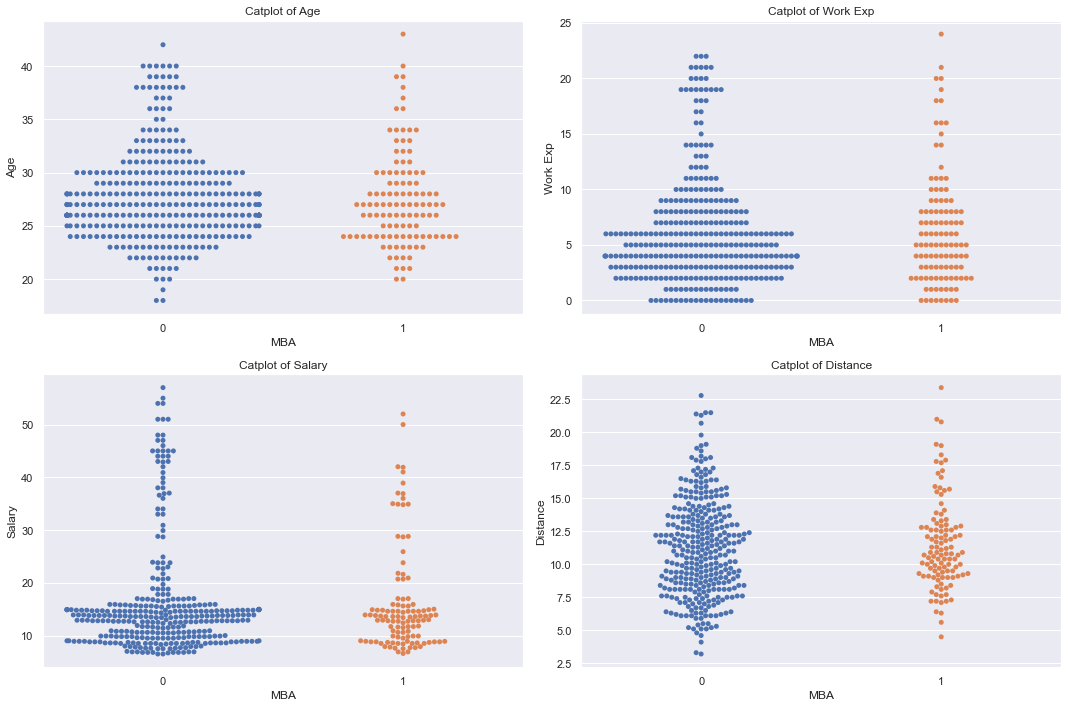

In [19]:
feature=df_num.columns
plt.figure(figsize=(15,10))
for i in range(len(feature)):
    plt.subplot(2,2,i+1)
    sns.swarmplot(y=df_num[feature[i]], x=df.MBA, data=df)
    plt.title("Catplot of {}".format(feature[i]))
    plt.tight_layout()
    
print("                                       SWARM-PLOT OF ALL VARIABLES IN COMPARISION WITH 'MBA'                              ");

## <font color ='green'>Observation:<font color = 'black'>
    
- From above "Age" graph, we can see that People with no MBA tend to have more counts.
- From above "Salary" graph, People with no MBA tend to have more count in the range between 10 to 20 lakhs.
- From above "Distance" graph, People with no MBA have more count who, tend to travel more distance.

### Checking the trend in the Data:

                                                           PAIR-PLOT


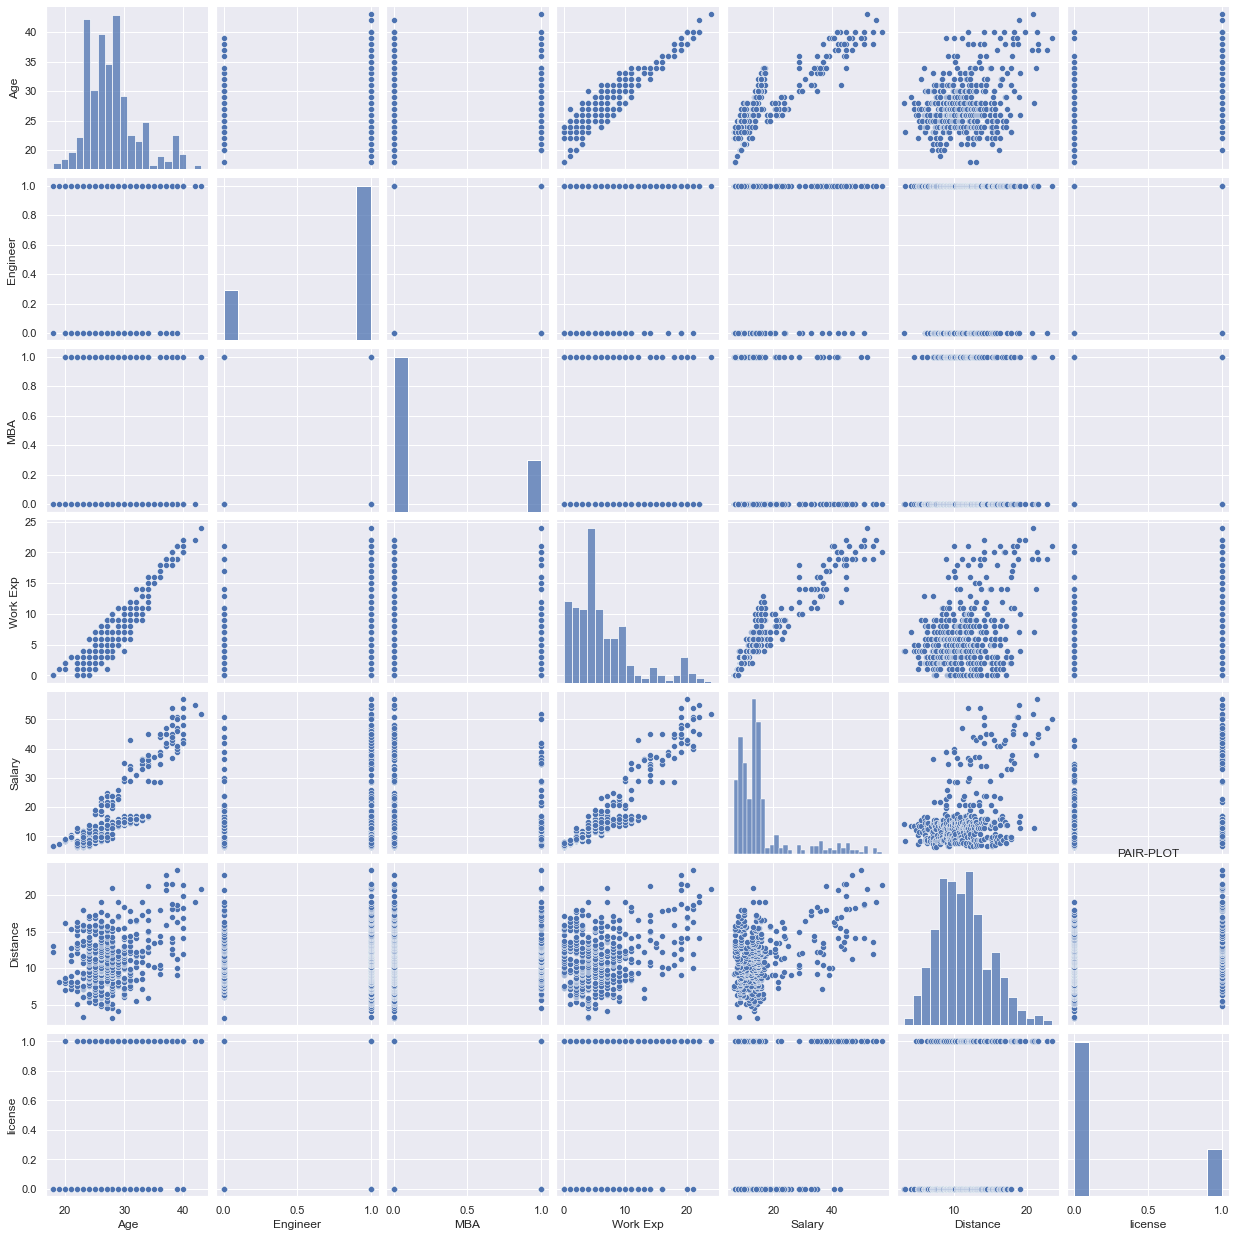

In [20]:
sns.pairplot(data=df)
plt.title('PAIR-PLOT');
print('                                                           PAIR-PLOT')

### <font color='green'>Observation:<font color='black'>
    
- From the above Pairplot, we can see, the more Age have more work Experience.
- The People with more Age has more Salary.
- In above Graph, we can cleary see that the more Work Experience.  

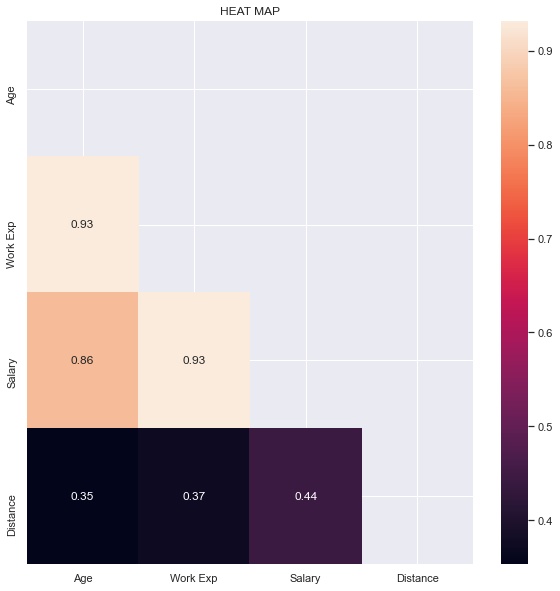

In [21]:
plt.figure(figsize=(10,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, fmt=".2f", mask= mask)
plt.grid(True)
plt.title('HEAT MAP');


### <font color = 'green'>Observation :<font color= 'black'>
- In the above heatmap, we can see high correlation between "Age" and "Work Exp".
- From the above heatmap, there is also a good correlation between "Salary" and "Age".
- Also, "Salary" and "Work Exp", show a high correlation.

## Checking for Outliers in the Data Set :

                                                BOXPLOT OF ALL NUMERIC VARIABLES


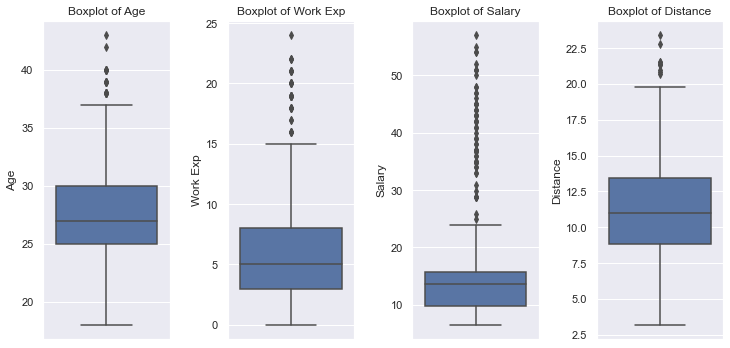

In [22]:
plt.figure(figsize=(18,5))
for i in range(len(feature)):
    plt.subplot(1,7,i+1)
    sns.boxplot(y=df[feature[i]],data=df)
    plt.title("Boxplot of {}".format(feature[i]))
    plt.tight_layout()
print('                                                BOXPLOT OF ALL NUMERIC VARIABLES')

Here, the Data set show us some outliers in above graph, show to make out model more efficent we need to treat the outliers.

In [23]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3 = np.quantile(col,[0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [24]:
for column in df[feature].columns:
    lr,ur = remove_outliers(df[column])
    df[column] = np.where(df[column]<lr,lr,df[column])
    df[column] = np.where(df[column]>ur,ur,df[column])

                                                BOXPLOT OF ALL NUMERIC VARIABLES


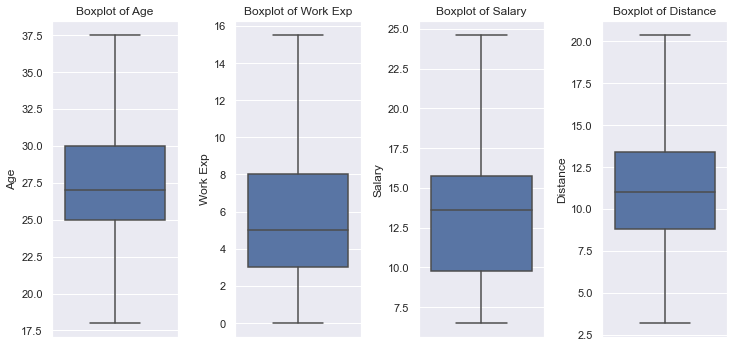

In [25]:
plt.figure(figsize=(18,5))
for i in range(len(feature)):
    plt.subplot(1,7,i+1)
    sns.boxplot(y=df[feature[i]],data=df)
    plt.title("Boxplot of {}".format(feature[i]))
    plt.tight_layout()
print('                                                BOXPLOT OF ALL NUMERIC VARIABLES')

### One Hot Encoding on Discreate Data set :

### <font color='green'>Encoding:<font color = 'black'>

We need to perform Dummies encoding to convert discrete variable in Dummy variables for further analysis.

In [26]:
#drope the target variable form the list df_cat
df_cat.drop(columns='Transport', axis=1)

,Gender,Engineer,MBA,license
0,Male,0,0,0
1,Female,1,0,0
2,Male,1,0,0
3,Female,1,1,0
4,Male,1,0,0
...,...,...,...,...
439,Male,1,0,1
440,Male,1,0,1
441,Male,1,0,1
442,Male,0,0,1


In [27]:
df =pd.get_dummies(df, columns=["Gender","Engineer","MBA", "license"],drop_first=True)
df

,Age,Work Exp,Salary,Distance,Transport,Gender_Male,Engineer_1,MBA_1,license_1
0,28.0,4.0,14.3000,3.2000,Public Transport,1,0,0,0
1,23.0,4.0,8.3000,3.3000,Public Transport,0,1,0,0
2,29.0,7.0,13.4000,4.1000,Public Transport,1,1,0,0
3,28.0,5.0,13.4000,4.5000,Public Transport,0,1,1,0
4,27.0,4.0,13.4000,4.6000,Public Transport,1,1,0,0
...,...,...,...,...,...,...,...,...,...
439,37.5,15.5,24.6125,20.3625,Private Transport,1,1,0,1
440,37.5,15.5,24.6125,20.3625,Private Transport,1,1,0,1
441,37.0,15.5,24.6125,20.3625,Private Transport,1,1,0,1
442,37.0,15.5,24.6125,20.3625,Private Transport,1,0,0,1


In [28]:
df['Transport'] = pd.Categorical(df['Transport']).codes

In [98]:
print('Performed Encoding for "Transport" variable :')
df.head()

Performed Encoding for "Transport" variable :


,Age,Work Exp,Salary,Distance,Transport,Gender_Male,Engineer_1,MBA_1,license_1
0,0.512821,0.258065,0.430642,0.000000,1,1,0,0,0
1,0.256410,0.258065,0.099379,0.005827,1,0,1,0,0
2,0.564103,0.451613,0.380952,0.052440,1,1,1,0,0
3,0.512821,0.322581,0.380952,0.075747,1,0,1,1,0
4,0.461538,0.258065,0.380952,0.081573,1,1,1,0,0


## 1.2. Split the data into train and test in the ratio 70:30. Is scaling necessary or not?


### Scaling the Data: 

Scaling is a necessity when using Distance-Based models, but however this data set also have some binary values. So, keeping this in mind we will scale the data by using Min-Max scaling.

In [30]:
sc= MinMaxScaler()

In [31]:
df[['Work Exp', 'Distance','Salary','Age']] = sc.fit_transform(df[['Work Exp', 'Distance','Salary','Age']])

In [32]:
df.head()

,Age,Work Exp,Salary,Distance,Transport,Gender_Male,Engineer_1,MBA_1,license_1
0,0.512821,0.258065,0.430642,0.000000,1,1,0,0,0
1,0.256410,0.258065,0.099379,0.005827,1,0,1,0,0
2,0.564103,0.451613,0.380952,0.052440,1,1,1,0,0
3,0.512821,0.322581,0.380952,0.075747,1,0,1,1,0
4,0.461538,0.258065,0.380952,0.081573,1,1,1,0,0


### <font color = 'green'> Split the data into train and test in the ratio 70:30

In [33]:
X = df.drop('Transport', axis=1)
y = df[['Transport']]

In [34]:
print("Independants Variables :")
print('X = Data without "Holliday_Package_yes" variable')
X.head()

Independants Variables :
X = Data without "Holliday_Package_yes" variable


,Age,Work Exp,Salary,Distance,Gender_Male,Engineer_1,MBA_1,license_1
0,0.512821,0.258065,0.430642,0.000000,1,0,0,0
1,0.256410,0.258065,0.099379,0.005827,0,1,0,0
2,0.564103,0.451613,0.380952,0.052440,1,1,0,0
3,0.512821,0.322581,0.380952,0.075747,0,1,1,0
4,0.461538,0.258065,0.380952,0.081573,1,1,0,0


In [35]:
print("Target or Dependant Variable :")
print('y = Data of only "Holliday_Package_yes" vairable')
y.head()

Target or Dependant Variable :
y = Data of only "Holliday_Package_yes" vairable


,Transport
0,1
1,1
2,1
3,1
4,1


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=0,stratify=y)

In [37]:
print("Technic used to split the data :")
print(' ')
print("X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=0)")

Technic used to split the data :
 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=0)


So. now the data has been split into "X_train","X_test" and "y_train","y_test"

## 1.3. Build the following models on the 70% training data and check the performance of these models on the Training as well as the 30% Test data using the various inferences from the Confusion Matrix and plotting a AUC-ROC curve along with the AUC values. Tune the models wherever required for optimum performance.:

- **a.** Logistic Regression Model
- **b.** Linear Discriminant Analysis
- **c.** Decision Tree Classifier – CART model 
- **d.** Naïve Bayes Model 
- **e.** KNN Model
- **f.** Random Forest Model 
- **g.** Boosting Classifier Model using Gradient boost.

## Logistic Regression Model:

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
clf = LogisticRegression()

In [40]:
Logistic_Regression = clf.fit(X_train,y_train)
print ('The Logistic Regression model is build using :', Logistic_Regression)

The Logistic Regression model is build using : LogisticRegression()


In [41]:
ytrain_predict_LR = Logistic_Regression.predict(X_train)
ytest_predict_LR = Logistic_Regression.predict(X_test)

In [42]:
ytest_predict_prob_LR=Logistic_Regression.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_LR).head()

,0,1
0,0.722472,0.277528
1,0.126479,0.873521
2,0.180052,0.819948
3,0.095330,0.904670
4,0.903204,0.096796


In [43]:
print('Index formed after encoding:')
print('____________________________')
df.columns

Index formed after encoding:
____________________________


Index(['Age', 'Work Exp', 'Salary', 'Distance', 'Transport', 'Gender_Male',
       'Engineer_1', 'MBA_1', 'license_1'],
      dtype='object')

### Check the AUC and ROC of the Traning data:

AUC: 0.806


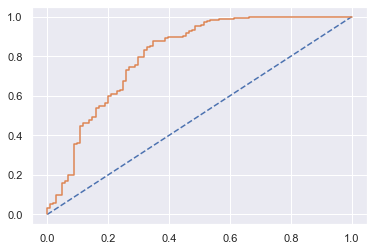

In [44]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = Logistic_Regression.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [45]:
# Accuracy - Test Data
LR_Test_Score = Logistic_Regression.score(X_test, y_test)
LR_Traint_Score = Logistic_Regression.score(X_train, y_train)
print (LR_Test_Score)

0.8059701492537313


### Check the AUC and ROC of the Testing data:

AUC: 0.806


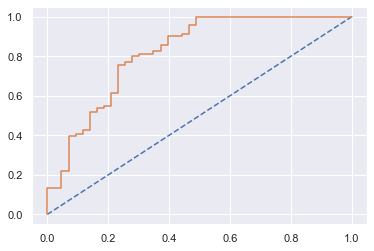

In [46]:
# predict probabilities
probs = Logistic_Regression.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### Confusion Matrix of Train Data set:

In [47]:
#ytrain_predict_LR = Logistic_Regression.predict(X_train)
model_score = Logistic_Regression.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict_LR))
print(metrics.classification_report(y_train, ytrain_predict_LR))

0.7967741935483871
[[ 53  48]
 [ 15 194]]
              precision    recall  f1-score   support

           0       0.78      0.52      0.63       101
           1       0.80      0.93      0.86       209

    accuracy                           0.80       310
   macro avg       0.79      0.73      0.74       310
weighted avg       0.79      0.80      0.78       310



### Confusion Matrix of Test Data set:

In [48]:
#ytest_predict_LR = Logistic_Regression.predict(X_test)
model_score = Logistic_Regression.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict_LR))
print(metrics.classification_report(y_test, ytest_predict_LR))

0.8059701492537313
[[23 20]
 [ 6 85]]
              precision    recall  f1-score   support

           0       0.79      0.53      0.64        43
           1       0.81      0.93      0.87        91

    accuracy                           0.81       134
   macro avg       0.80      0.73      0.75       134
weighted avg       0.80      0.81      0.79       134



## Linear Discriminant Analysis Model :

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

### Prediction Score :

In [50]:
## Performance Matrix on train data set
y_train_predict_LDA = LDA_model.predict(X_train)
LDA_train_score = LDA_model.score(X_train, y_train)
print('The prediction score of the train model is: ',LDA_train_score)


The prediction score of the train model is:  0.8032258064516129


### Confusion Matrics of Train Data set

[[ 58  43]
 [ 18 191]]


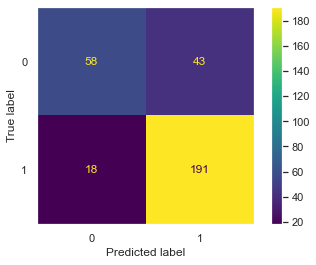

In [51]:
print(metrics.confusion_matrix(y_train, y_train_predict_LDA))
plot_confusion_matrix(LDA_model, X_train,y_train)
plt.grid(False)


### Classification Report of Train Data Set :

In [52]:
print(metrics.classification_report(y_train, y_train_predict_LDA))

              precision    recall  f1-score   support

           0       0.76      0.57      0.66       101
           1       0.82      0.91      0.86       209

    accuracy                           0.80       310
   macro avg       0.79      0.74      0.76       310
weighted avg       0.80      0.80      0.79       310



### Classification Report of Test Data Set :

In [53]:
y_test_predict_LDA = LDA_model.predict(X_test)
LDA_test_score = LDA_model.score(X_test, y_test)
print('The prediction score of the test model is: ',LDA_test_score)


The prediction score of the test model is:  0.7761194029850746


In [54]:
print(metrics.classification_report(y_test, y_test_predict_LDA))

              precision    recall  f1-score   support

           0       0.70      0.53      0.61        43
           1       0.80      0.89      0.84        91

    accuracy                           0.78       134
   macro avg       0.75      0.71      0.72       134
weighted avg       0.77      0.78      0.77       134



### Confusion Matric of Test Data set :

[[23 20]
 [10 81]]


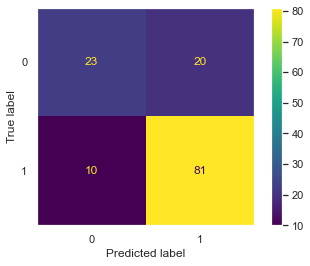

In [55]:
print(metrics.confusion_matrix(y_test, y_test_predict_LDA))
plot_confusion_matrix(LDA_model, X_test,y_test)
plt.grid(False)


## Decision Tree Classifier – CART model 

In [56]:
Cart_model = DecisionTreeClassifier(criterion="gini", random_state=0)
Cart_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [57]:
from sklearn import tree

train_char_label = ['1', '0']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(Cart_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

The Below a link will display a .dot file in your working directory.
WebGraphviz is Graphviz in the Browser.
Copy paste the contents of the file into the link below to get the visualization
http://webgraphviz.com/abs

### Important Variables :

In [58]:
print(pd.DataFrame(Cart_model.feature_importances_,columns=['Imp'],index= X_train.columns).sort_values("Imp", ascending=False))

                  Imp
Salary       0.329600
Distance     0.181266
license_1    0.142232
Work Exp     0.123762
Age          0.106689
Gender_Male  0.058337
Engineer_1   0.035737
MBA_1        0.022378


In [59]:
y_test_predict_DT = Cart_model.predict(X_test)

In [60]:
DT_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 50,min_samples_leaf=100,min_samples_split=1000,random_state=0)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, min_samples_leaf=100,
                       min_samples_split=1000, random_state=0)

### Prediction Score Train Data set :

In [61]:
y_train_predict_DT = DT_model.predict(X_train)
DT_train_Score = DT_model.score(X_train, y_train)
print('The prediction model score for Decision Tree Classifier is :',DT_train_Score)
    

The prediction model score for Decision Tree Classifier is : 0.6741935483870968


### Confusion Matric of Train Data Set :

[[  0 101]
 [  0 209]]


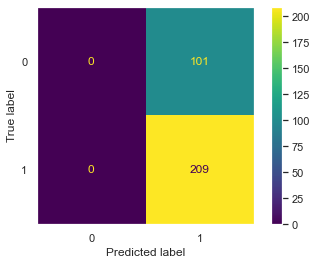

In [62]:
print(metrics.confusion_matrix(y_train, y_train_predict_DT))
plot_confusion_matrix(DT_model, X_train,y_train)
plt.grid(False)

### Classification Report of Train Data set :

In [63]:
print(metrics.classification_report(y_train, y_train_predict_DT))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.67      1.00      0.81       209

    accuracy                           0.67       310
   macro avg       0.34      0.50      0.40       310
weighted avg       0.45      0.67      0.54       310



### Prediction Score Test Data set :

In [64]:
y_test_predict_DT = DT_model.predict(X_test)
DT_test_Score = DT_model.score(X_test, y_test)
print('The prediction model score for Decision Tree Classifier is :',DT_test_Score)
    

The prediction model score for Decision Tree Classifier is : 0.6791044776119403


### Confusion Matric of Test Data Set :

[[ 0 43]
 [ 0 91]]


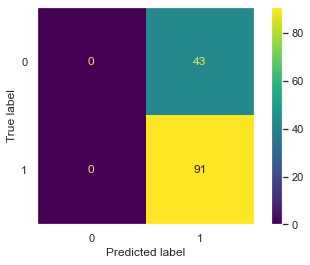

In [65]:
print(metrics.confusion_matrix(y_test, y_test_predict_DT))
plot_confusion_matrix(DT_model, X_test,y_test)
plt.grid(False)

### Classification Report of Test Data set :

In [66]:
print(metrics.classification_report(y_test, y_test_predict_DT))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.68      1.00      0.81        91

    accuracy                           0.68       134
   macro avg       0.34      0.50      0.40       134
weighted avg       0.46      0.68      0.55       134



## Naive Bayes Algorithm Model :

In [67]:
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()

In [68]:
# using Gaussian algorithm from Naive Bayes
from sklearn.impute import SimpleImputer
# creatw the model
NB_model = GaussianNB()
NB_model.fit(X_train_array, y_train_array.ravel())
print('The model to import Navie Bayes Algorithm Model is :',NB_model.fit(X_train_array, y_train_array.ravel()))

The model to import Navie Bayes Algorithm Model is : GaussianNB()


### Performance of Naive Bayes model with training data :

In [69]:
NB_train_predict = NB_model.predict(X_train_array)
NB_train_score = metrics.accuracy_score(y_train_array, NB_train_predict)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train_array, NB_train_predict)))

Model Accuracy: 0.7742


### Confusion Matrix of Train Data set:

Confusion Matrix
[[ 55  46]
 [ 24 185]]


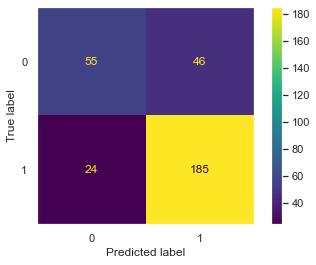

In [70]:
print("Confusion Matrix")

print(metrics.confusion_matrix(y_train_array, NB_train_predict))
plot_confusion_matrix(NB_model, X_train_array,y_train_array)
plt.grid(False)

### Classification Report of Train Data set :

In [71]:
print("Classification Report")
print(metrics.classification_report(y_train_array, NB_train_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.80      0.89      0.84       209
           0       0.70      0.54      0.61       101

    accuracy                           0.77       310
   macro avg       0.75      0.71      0.73       310
weighted avg       0.77      0.77      0.77       310



### Performance of Naive Bayes model with testing data :

In [72]:
NB_test_predict = NB_model.predict(X_test_array)
NB_test_score = metrics.accuracy_score(y_test_array, NB_test_predict)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test_array, NB_test_predict)))

Model Accuracy: 0.8060


### Confusion Matrix of Test Data set:

Confusion Matrix
[[27 16]
 [10 81]]


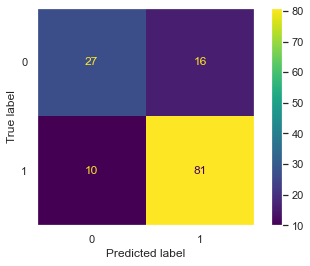

In [73]:
print("Confusion Matrix")

print(metrics.confusion_matrix(y_test_array, NB_test_predict))
plot_confusion_matrix(NB_model, X_test_array,y_test_array)
plt.grid(False)

### Classification Report of Test Data set :

In [74]:
print("Classification Report")
print(metrics.classification_report(y_test_array, NB_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.84      0.89      0.86        91
           0       0.73      0.63      0.68        43

    accuracy                           0.81       134
   macro avg       0.78      0.76      0.77       134
weighted avg       0.80      0.81      0.80       134



## KNN Model: 

In [75]:
KNN_model = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [76]:
KNN_model.fit(X_train, y_train)
print('The model to import KNN Model is :',KNN_model.fit(X_train, y_train))

The model to import KNN Model is : KNeighborsClassifier(weights='distance')


### Performance of KNN model with Training data :

In [77]:
KNN_train_predict = KNN_model.predict(X_train)
KNN_train_score = metrics.accuracy_score(y_train, KNN_train_predict)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, KNN_train_predict)))

Model Accuracy: 1.0000


### Confusion Matrix of Train Data set:

Confusion Matrix
[[101   0]
 [  0 209]]


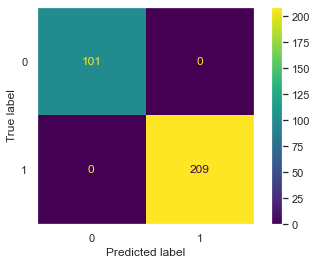

In [78]:
print("Confusion Matrix")

print(metrics.confusion_matrix(y_train, KNN_train_predict))
plot_confusion_matrix(KNN_model, X_train,y_train)
plt.grid(False)

### Classification Report of Train Data set :

In [79]:
print("Classification Report")
print(metrics.classification_report(y_train, KNN_train_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       209
           0       1.00      1.00      1.00       101

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



### Performance of Naive Bayes model with testing data :

In [80]:
KNN_test_predict = KNN_model.predict(X_test)
KNN_test_score = metrics.accuracy_score(y_test, KNN_test_predict)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, KNN_test_predict)))

Model Accuracy: 0.8060


### Confusion Matrix of Test Data set:

Confusion Matrix
[[28 15]
 [11 80]]


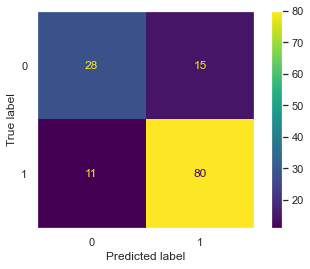

In [81]:
print("Confusion Matrix")

print(metrics.confusion_matrix(y_test, KNN_test_predict))
plot_confusion_matrix(KNN_model, X_test,y_test)
plt.grid(False)

### Classification Report of Test Data set :

In [82]:
print("Classification Report")
print(metrics.classification_report(y_test, KNN_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.84      0.88      0.86        91
           0       0.72      0.65      0.68        43

    accuracy                           0.81       134
   macro avg       0.78      0.77      0.77       134
weighted avg       0.80      0.81      0.80       134



## Random Forest Model: 

In [83]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
print('The model to import KNN Model is :',RF_model.fit(X_train, y_train))

The model to import KNN Model is : RandomForestClassifier(random_state=1)


### Performance of Random Forest model with Training data :

In [84]:
RF_train_predict = RF_model.predict(X_train)
RF_train_score = metrics.accuracy_score(y_train, RF_train_predict)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, RF_train_predict)))

Model Accuracy: 1.0000


### Confusion Matrix of Train Data set:

Confusion Matrix
[[101   0]
 [  0 209]]


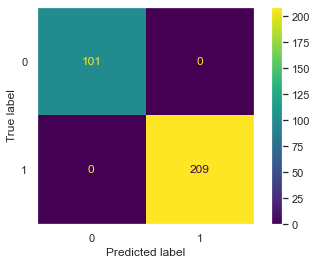

In [85]:
print("Confusion Matrix")

print(metrics.confusion_matrix(y_train, RF_train_predict))
plot_confusion_matrix(KNN_model, X_train,y_train)
plt.grid(False)

### Classification Report of Train Data set :

In [86]:
print("Classification Report")
print(metrics.classification_report(y_train, RF_train_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       209
           0       1.00      1.00      1.00       101

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



### Performance of Random Forest model with Testing data :

In [87]:
RF_test_predict = RF_model.predict(X_test)
RF_test_Score = metrics.accuracy_score(y_test, RF_test_predict)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, RF_test_predict)))

Model Accuracy: 0.8582


### Confusion Matrix of Test Data set:

Confusion Matrix
[[31 12]
 [ 7 84]]


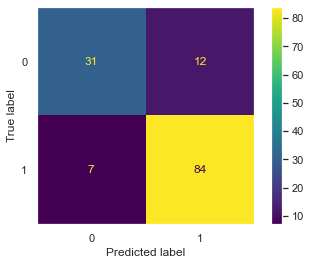

In [88]:
print("Confusion Matrix")

print(metrics.confusion_matrix(y_test, RF_test_predict))
plot_confusion_matrix(RF_model, X_test,y_test)
plt.grid(False)

### Classification Report of Test Data set :

In [89]:
print("Classification Report")
print(metrics.classification_report(y_test, RF_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.88      0.92      0.90        91
           0       0.82      0.72      0.77        43

    accuracy                           0.86       134
   macro avg       0.85      0.82      0.83       134
weighted avg       0.86      0.86      0.86       134



## Extreme Gradient Boost Model: 

In [90]:
XGB_model=xgboost.XGBClassifier(random_state=1,learning_rate=0.01)
print('The model to import KNN Model is :',XGB_model.fit(X_train, y_train))

The model to import KNN Model is : XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)


### Performance of Extreme Gradient Boost model with Training data :

In [91]:
XGB_train_predict = XGB_model.predict(X_train)
XGB_train_Score = metrics.accuracy_score(y_train, XGB_train_predict)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, XGB_train_predict)))

Model Accuracy: 0.9387


### Confusion Matrix of Train Data set:

Confusion Matrix
[[ 88  13]
 [  6 203]]


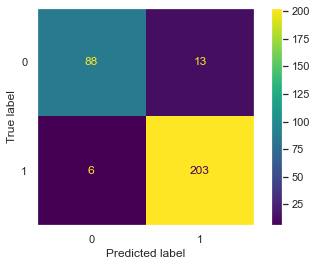

In [92]:
print("Confusion Matrix")

print(metrics.confusion_matrix(y_train, XGB_train_predict))
plot_confusion_matrix(XGB_model, X_train,y_train)
plt.grid(False)

### Classification Report of Train Data set :

In [93]:
print("Classification Report")
print(metrics.classification_report(y_train, XGB_train_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.94      0.97      0.96       209
           0       0.94      0.87      0.90       101

    accuracy                           0.94       310
   macro avg       0.94      0.92      0.93       310
weighted avg       0.94      0.94      0.94       310



### Performance of Extreme Gradient Boost model with Testing data :

In [94]:
XGB_test_predict = XGB_model.predict(X_test)
XGB_test_score = metrics.accuracy_score(y_test, XGB_test_predict)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, XGB_test_predict)))

Model Accuracy: 0.8433


### Confusion Matrix of Test Data set:

Confusion Matrix
[[31 12]
 [ 9 82]]


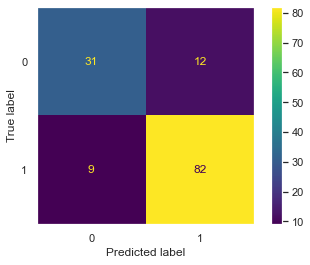

In [95]:
print("Confusion Matrix")

print(metrics.confusion_matrix(y_test, XGB_test_predict))
plot_confusion_matrix(XGB_model, X_test,y_test)
plt.grid(False)

### Classification Report of Test Data set :

In [96]:
print("Classification Report")
print(metrics.classification_report(y_test, XGB_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.87      0.90      0.89        91
           0       0.78      0.72      0.75        43

    accuracy                           0.84       134
   macro avg       0.82      0.81      0.82       134
weighted avg       0.84      0.84      0.84       134



## 1.4. Which model performs the best?

## <font color = 'Green'> Observation :<font color ='black'>
    
In the below table, we have built multiple model and complied the score to compare it with each other.

In [97]:
index=['Logistic Regression Model','Linear Discriminant Analysis','Decision Tree Classifier – CART model','Naïve Bayes Model','KNN Model','Random Forest Model','Boosting Classifier Model using Gradient boost']
data = pd.DataFrame({'Train_Score':[LR_Traint_Score,LDA_train_score,DT_train_Score,NB_train_score,KNN_train_score,RF_train_score,XGB_train_Score],
       'Test_Score':[LR_Test_Score,LDA_test_score,DT_test_Score,NB_test_score,KNN_test_score,RF_test_Score,XGB_test_score]},index=index)
round(data,2)

,Train_Score,Test_Score
Logistic Regression Model,0.80,0.81
Linear Discriminant Analysis,0.80,0.78
Decision Tree Classifier – CART model,0.67,0.68
Naïve Bayes Model,0.77,0.81
KNN Model,1.00,0.81
Random Forest Model,1.00,0.86
Boosting Classifier Model using Gradient boost,0.94,0.84


## <font color = 'Green'>Inference :<font color ='black'>
    
- From the above table, "Logistic Regression Model" and "Linear Discriminant Analysis" has balanced score on bases of Train & Test Score.
    
- From the above table - "KNN Model" and "Random Forest Model" has the highest Train score but the Test score is very less, which make these model as Overrfitting.
    
- From the above table, "Decision Tree Classifier - CART model" has the lowest Train Score and Test Score, which makes this model as Underfitting.
    
- So, After observing all the models from the above table, we cam to conclusion that "Logistic Regression Model" has the right score.

## 1.5 What are your business insights?

We had a business problem in which, we need to predict whether how do the 
employees of ABC Consulting prefer to commute presently (between home and office) on the basis of the information given in the data set. And, for this problem, we had perform Logistic Regression, Linear Discriminant Analysis,  Decision Tree Classifier – CART model, Naïve Bayes Model,  KNN Model, Random Forest Model and Boosting Classifier Model using Gradient boost for prediction, in which Logistic Regression Model perform quite Well. 

Also, after performing Exploratory Data Analysis, we found :

-  We have 4, "Numerical" data type.
-  We have 'Age', 'Work Exp', 'Salary' and 'Distance'.
-  It's seem that, there most of the variable such as "Age" and "Distance" have normally distribution. 
- But after analzed very closly, we found that "Salary" and "Work Exp" has tend to show sligthly right skewness.

- We can see that in the "Vote" variable, "Labor" seems to have more count as compare to other.
- We can see that, female has the highest number of count in this data set.
- "Engineer", the count of Engineers is more.
- "License", we can see that count of employees with no license is more.
- Employees of Age between 24 years to 30 years tend to use transport facility.
- Employees with Work Experience between 0 years to 10 years approx, utilize transport facility.
- Employees with salary range between 10 to 18, use transport.
- Employees with less distance use transport.

### <font color = 'green'> Recommendations :<font color = 'black'>
- To improve Tansport, we can bring many offers for the people who are +30 years old.
- For the Employees having High Salary, we can provide them some tranport with extra benefit because their salary can effort the services and also, they can be in office on time.

### <font color = 'green'> The Best variable, we pull out from the equation are : <font color = 'black'><br/>
    
- **Salary** , which is the Employee Salary.
    
    
- **Age**     : The Employee age in years.
    

- **Work Exp**     : Experience in years.

# THE END